# 数据分析实操专题练习-Numpy
---

**习题说明：**

- 练习时间：6小时
- 练习环境：jupyter notebook
- 练习要求：所有操作命令或代码均在此notebook文件中编写，完整的Python程序可新建为扩展名为.py的文本文件，然后在本notebook中使用命令或者以引入模块的方式调用执行。程序运行结果必须在此notebook中输出。

## 数据预处理与可视化

### 数据描述

高校学生入学成绩数据分为4个数据文件，分别为：

- 班级信息表（datalab/40538/class_info.csv）
- 学生信息表（datalab/40538/student_info.csv）
- 院系信息表（datalab/40538/department_info.csv）
- 学生成绩表（datalab/40538/student_scores.csv）


### 题目要求

请使用**numpy**编程完成以下操作任务。【注：只能使用numpy和matplotlib，禁止使用第三方工具包】

#### 第1题（难易程度：* ）

分别导入上述数据文件，完成以下操作：

1. 输出每个数据表的行列数（形状）和头5行

In [4]:
# 导入必需包
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 加载班级信息表
classes_info = np.loadtxt('./datalab/40538/class_info.csv', delimiter=',', dtype='str')
print('行列数：', classes_info.shape)
classes_info[:5]

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 0-3: ordinal not in range(256)

In [4]:
# 加载学生信息表
students_info = np.loadtxt('data/学生信息表.txt', delimiter=',', dtype='str')
print('行列数：', students_info.shape)
students_info[:5]

行列数： (761, 5)


array([['学号', '姓名', '性别', '所属班级编号', '入学日期'],
       ['170401011001', '施礼义', '男', '0101', '20170901'],
       ['170401011002', '王旭', '男', '0101', '20170901'],
       ['170401011003', '肖桢', '女', '0101', '20170901'],
       ['170401011004', '吴佩东', '男', '0101', '20170901']], dtype='<U12')

In [5]:
# 加载院系信息表
departments_info = np.loadtxt('data/院系信息表.txt', delimiter=',', dtype='str', encoding='gbk')
print('行列数：', departments_info.shape)
departments_info[:5]

行列数： (96, 2)


array([['院系编号', '院系名称'],
       ['01', '计算机学院'],
       ['01', '计算机学院'],
       ['01', '计算机学院'],
       ['01', '计算机学院']], dtype='<U8')

In [6]:
# 加载学生成绩表
students_scores = np.loadtxt('data/学生成绩表.txt', delimiter=',', dtype=str, encoding='gbk')
print('行列数：', students_scores.shape)
students_scores[:5]

行列数： (128, 5)


array([['学号', '姓名', '性别', '所属班级编号', '入学成绩'],
       ['170401011001 ', '施礼义', '男', '0101', '467'],
       ['170401011002 ', '王旭', '男', '0101', '518'],
       ['170401011003 ', '肖桢', '女', '0101', '509'],
       ['170401011004 ', '吴佩东', '男', '0101', '508']], dtype='<U13')

2. 去除院系信息表和学生信息表中的重复行，去重后的数据分别保存为"院系信息表-1.csv"和"学生信息表-1.csv"文件

In [7]:
departments_info = np.vstack((departments_info[0], np.unique(departments_info[1:], axis=0)))
departments_info

array([['院系编号', '院系名称'],
       ['01', '计算机学院'],
       ['02', '经济管理学院'],
       ['03', '软件与微电子学院'],
       ['04', '信息科学技术学院']], dtype='<U8')

3. 去除学生信息表中存在的空白字符

In [8]:
students_scores = np.char.strip(students_scores)
students_scores[:5]

array([['学号', '姓名', '性别', '所属班级编号', '入学成绩'],
       ['170401011001', '施礼义', '男', '0101', '467'],
       ['170401011002', '王旭', '男', '0101', '518'],
       ['170401011003', '肖桢', '女', '0101', '509'],
       ['170401011004', '吴佩东', '男', '0101', '508']], dtype='<U13')

In [9]:
np.savetxt('院系信息表-1.csv', departments_info, fmt='%s', delimiter=',')
!cat 院系信息表-1.csv

院系编号,院系名称

01,计算机学院

02,经济管理学院

03,软件与微电子学院

04,信息科学技术学院


#### 第2题（难易程度：* ）

1. 将学生成绩表按列划分为两个表，分别为**学生基本信息表**（学号，姓名，性别，所属班级编号）和**学号成绩表**（学号，入学成绩），分别保存为"学生基本信息表-2.csv"和"学号成绩表-2.csv"

In [10]:
# 学生基本信息表
students_basic_info = students_scores[:, 0:4]
np.savetxt('学生基本信息表-3.csv', students_basic_info, fmt='%s', delimiter=',')
!cat 学生基本信息表-3.csv | head -n 10

学号,姓名,性别,所属班级编号

170401011001,施礼义,男,0101

170401011002,王旭,男,0101

170401011003,肖桢,女,0101

170401011004,吴佩东,男,0101

170401011005,魏会,男,0101

170401011006,曾美,女,0101

170401011007,邵亚,女,0101

170401011008,朱燕菊,女,0101

170401011009,杨明书,男,0101


In [11]:
# 学号成绩表
id_scores = students_scores[:, [0, 4]]
np.savetxt('学号成绩表-3.csv', id_scores, fmt='%s', delimiter=',')
!cat 学号成绩表-3.csv | head -n 10

学号,入学成绩

170401011001,467

170401011002,518

170401011003,509

170401011004,508

170401011005,494

170401011006,500

170401011007,490

170401011008,466

170401011009,534


2. 将学生信息表拆分为两个表，分别为学生基本信息表2（学号，姓名，性别，所属班级编号）和入学日期表（学号，入学日期），分别保存为"学生基本信息表-2-2.csv"和"入学日期表-2.csv"

In [12]:
# 学生基本信息表2
students_basic_info2 = students_info[:, 0:4]
np.savetxt('学生基本信息表-2-2.csv', students_basic_info2, fmt='%s', delimiter=',')
!cat 学生基本信息表-2-2.csv | head -n 10

学号,姓名,性别,所属班级编号

170401011001,施礼义,男,0101

170401011002,王旭,男,0101

170401011003,肖桢,女,0101

170401011004,吴佩东,男,0101

170401011005,魏会,男,0101

170401011006,曾美,女,0101

170401011007,邵亚,女,0101

170401011008,朱燕菊,女,0101

170401011009,杨明书,男,0101


In [13]:
# 入学日期表
id_dates = students_info[:, [0, 4]]
np.savetxt('入学日期表-2.csv', id_dates, fmt='%s', delimiter=',')
!cat 入学日期表-2.csv | head -n 10

学号,入学日期

170401011001,20170901

170401011002,20170901

170401011003,20170901

170401011004,20170901

170401011005,20170901

170401011006,20170901

170401011007,20170901

170401011008,20170901

170401011009,20170901


3. 将**学生基本信息表**，**入学日期表**和**学号成绩表**合并为**学生入学成绩表**，忽略没有对应成绩的行，并保存为"学生入学成绩表-2.csv"

In [14]:
# 查看这些表的行数
len(students_basic_info), len(id_dates), len(id_scores)

(128, 761, 128)

In [15]:
# 确保学号匹配
# 这里使用数据本身的特点（三个表前128行的学号正好一一对应），可以考虑使用更为通用的方案，实现像pandas的连接操作
np.all(students_basic_info[:, 0] == id_dates[:128, 0]), np.all(id_dates[:128, 0] == id_scores[:, 0])

(True, True)

In [16]:
student_enrol_scores = np.concatenate((students_basic_info, id_dates[:128, [1]], id_scores[:, [1]]), axis=1)
np.savetxt('学生入学成绩表-2.csv', student_enrol_scores, fmt='%s', delimiter=',')
!cat 学生入学成绩表-2.csv | head -n 10

学号,姓名,性别,所属班级编号,入学日期,入学成绩

170401011001,施礼义,男,0101,20170901,467

170401011002,王旭,男,0101,20170901,518

170401011003,肖桢,女,0101,20170901,509

170401011004,吴佩东,男,0101,20170901,508

170401011005,魏会,男,0101,20170901,494

170401011006,曾美,女,0101,20170901,500

170401011007,邵亚,女,0101,20170901,490

170401011008,朱燕菊,女,0101,20170901,466

170401011009,杨明书,男,0101,20170901,534


#### 第3题（难易程度：* ）

统计**学生信息表**中的男女生比例，绘制爆裂式饼图，标题为"2017年入学男女生比例"，并显示男女生的百分比。图表保存为"2017年入学男女生比例.png"文件

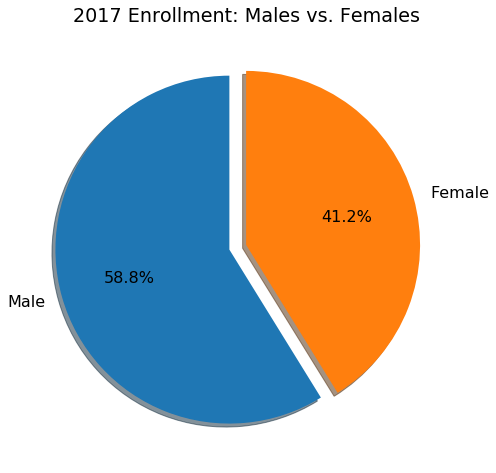

In [32]:
# 操作代码
sexes = students_info[:, 2]
male_count = len(sexes[sexes=='男'])
female_count = len(sexes[sexes=='女'])

labels = ['Male', 'Female']
data = [males_count, female_count]

plt.figure(figsize=(8, 8))
plt.rc('font', size=16)

plt.pie(data, explode=[0.1, 0], labels=labels, autopct='%3.1f%%', startangle=90, shadow=True)

plt.title('2017 Enrollment: Males vs. Females')
plt.savefig('2017年入学男女生比例.png')

plt.show()

#### 第4题 （难易程度：**）

统计**学生信息表中**不同班级的男生人数和女生人数，并绘制堆叠式柱状图，男生显示为绿色，女生显示为红色。横坐标为班级编号，纵坐标为男女生人数。图表保存为"班级男女生人数对比.png"

In [47]:
# 操作代码
males = students_info[:,2]=='男'
mclasses = students_info[males][:, 3]
mclass_ids, mcounts = np.unique(classes, return_counts=True)
mclass_ids, mcounts
# 若能显示中文，采用班级名称作为下标
mclass_ids.shape,classes_info[1:,1][mclass_ids.argsort()].shape

((58,), (58,))

#### 第5题 （难易程度：**）

绘制**学生入学成绩表**入学成绩的箱线图，在图表中以注解的形式显示中位数，最大值、最小值和异常值（如果有的话）

In [ ]:
# 操作代码


#### 第6题 （难易程度：**）

**学生信息表**中的学号存在大量重复，请将这些重复学号的中间4位替换为相应的班级编号。替换后的学生信息表保存为"学生信息表-6.csv"

In [ ]:
# 操作代码


#### 第7题  （难易程度：**）

结合**班级信息表**和**学生信息表**，统计不同院系的入学人数，并绘制条形图，其中横坐标为入学人数，纵坐标为院系名称，标题为“院系入学人数”。图表保存为“2017院系入学人数-7.csv"文件。

In [ ]:
# 操作代码


#### 第8题 （难易程度：**）

结合**班级信息表**和**学生入学成绩表**统计**不同院系**的入学平均成绩和男女生比例，并分别绘制柱状图和饼图

In [ ]:
# 操作代码


#### 第9题 （难易程度：** ）

将**学生信息表**和**学生成绩表**合并为一张新表，**保留**没有对应成绩的行，合并后缺失的成绩通过**随机选取**的方式从前面具有成绩的行中选取并填充缺失值。新表保存为"学生成绩表-9.csv"。

In [ ]:
# 操作代码


#### 第10题 （难易程度：**）

在第9题操作的基础上：

1. 计算**新表**中学生成绩的均值，方差、标准差和中位数
2. 绘制**新表**和**学生入学成绩表**入学成绩的箱线图，比较二者成绩分布的差异，以了解上述成绩填充的方式是否合理。图表标题为"成绩分布对比"，保存为"成绩分布对比-10.csv"。

In [ ]:
# 操作代码


#### 第11题 （难易程度：**）

在第9题操作的基础上：

1. 输出**新表**入学成绩最高和最低的学生姓名、所属班级和院系名称。注：若存在多个，则全部输出
2. 输出**新表**全体学生中，男生成绩最高和最低的学生姓名、所属班级和院系名称。注：若存在多个，则全部输出

In [ ]:
# 操作代码


#### 第12题 （难易程度：***）

在第9题操作的基础上：

1. 将**新表**按照院系拆分4个表，分别保存为形如"<院系名称>入学成绩表-12.csv"的文件
2. 按入学成绩的中位数将**新表**拆分为两个表，分别保存为"学生成绩表-高于中等-12.csv"和"学生成绩表-低于中等-12.csv"文件
3. 按入学成绩的均值将**新表**拆分为两个表，分别保存为"学生成绩表-高于平均-12.csv"和"学生成绩表-低于平均-12.csv"文件

In [ ]:
# 操作代码
